In [1596]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? allows use of basic linear regressio models.
from statsmodels.graphics.api import abline_plot # What does this do? plot for use with a linear regression line.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Metrics for evaluating a model's accuracy.
from sklearn.model_selection import train_test_split #  What does this do? Enables splitting data into train/test sets.
from sklearn import linear_model, preprocessing # What does this do? packages for linear regression and scaling data sets.
import warnings # For handling error messages.
from matplotlib.pyplot import figure

In [1597]:
df = pd.read_csv('/Users/markoglodovic/Downloads/electricity_clean.csv')

In [1598]:
df = df[['Period', 'Activity', 'Source', 'Destination', 'Energy', 'Total_Value', 'Price']]

In [1599]:
df['Period']=pd.to_datetime(df['Period'])

In [1600]:
cs = ['British Columbia', 'Manitoba', 'New Brunswick', 'Ontario', 'Québec','Saskatchewan','Alberta','Nova Scotia','Newfoundland and Labrador']
cd = ['British Columbia', 'Manitoba', 'New Brunswick', 'Ontario', 'Québec','Saskatchewan','Alberta','Nova Scotia','Newfoundland and Labrador']
canada_s = df[df['Source'].isin(cs)]
canada_d = df[df['Destination'].isin(cd)]

In [1601]:
canada_s1 = canada_s[canada_s['Period'] > '1997-01-01']
canada_d1 = canada_d[canada_d['Period'] > '1997-01-01']

In [1602]:
canada_d1 =  canada_d1.set_index('Period')
canada_s1 =  canada_s1.set_index('Period')

In [1603]:
canada_d1 = canada_d1.resample('M').sum()
canada_d1 = canada_d1.rename(columns = {'Energy':'EnergyD','Total_Value':'Total_ValueD','Price':'PriceD'})

In [1604]:
canada_s1 = canada_s1.resample('M').sum()
canada_s1 = canada_s1.rename(columns={'Energy':'EnergyS','Total_Value':'Total_ValueS','Price':'PriceS'})

In [1605]:
canada_net = pd.concat([canada_s1,canada_d1], axis =1)
canada_net['Net'] = canada_s1 ['EnergyS'] - canada_d1['EnergyD']

In [1606]:
canada_net.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 290 entries, 1997-02-28 to 2021-03-31
Freq: M
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EnergyS       290 non-null    float64
 1   Total_ValueS  290 non-null    float64
 2   PriceS        290 non-null    float64
 3   EnergyD       290 non-null    float64
 4   Total_ValueD  290 non-null    float64
 5   PriceD        290 non-null    float64
 6   Net           290 non-null    float64
dtypes: float64(7)
memory usage: 28.1 KB


In [1607]:
USAs = df[-df["Source"].isin(cs)]
USAd = df[-df["Destination"].isin(cs)]

In [1608]:
USAd = USAd[USAd['Period'] > '1997-01-01']
USAs = USAs[USAs['Period'] > '1997-01-01']



USAd = USAd.rename(columns = {'Energy':'EnergyD'})
USAs= USAs.rename(columns = {'Energy':'EnergyS'})

USAs = USAs[['Period', 'Source', 'EnergyS']]
USAd = USAd[['Period', 'Destination', 'EnergyD']]

In [1609]:
USAs.head()

,Period,Source,EnergyS
2362,1997-02-01,Maine,730.0
2363,1997-02-01,Michigan,1417.0
2364,1997-02-01,Montana,282.0
2365,1997-02-01,Montana,12.0
2366,1997-02-01,New York,8066.0


In [1610]:
USAd =  USAd.set_index('Period')
USAs=  USAs.set_index('Period')

In [1611]:
USAsG = USAs.groupby('Source').resample('M').sum()
USAdG = USAd.groupby('Destination').resample('M').sum()

In [1612]:
USAsG.head()

EnergyS
Source  Period             
Arizona 2004-09-30  12833.0
        2004-10-31    212.0
        2004-11-30   3188.0
        2004-12-31   4070.0
        2005-01-31  10633.0

In [1613]:
USAdG.head()

EnergyD
Destination Period             
Alaska      1997-02-28    88.80
            1997-03-31   126.50
            1997-04-30   103.40
            1997-05-31    98.64
            1997-06-30   101.04

In [1614]:
USAsG = USAsG.reset_index()
USAdG = USAdG.reset_index()

In [1615]:
USAsG.head()

,Source,Period,EnergyS
0,Arizona,2004-09-30,12833.0
1,Arizona,2004-10-31,212.0
2,Arizona,2004-11-30,3188.0
3,Arizona,2004-12-31,4070.0
4,Arizona,2005-01-31,10633.0


In [1616]:
USAsG = USAsG.pivot(index = 'Period', columns = 'Source', values = 'EnergyS')
USAdG = USAdG.pivot(index = 'Period', columns = 'Destination', values = 'EnergyD')

In [1617]:
USAsG.fillna(0, inplace=True)
USAdG.fillna(0, inplace=True)

In [1618]:
USAsG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 290 entries, 1997-02-28 to 2021-03-31
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Arizona           290 non-null    float64
 1   California        290 non-null    float64
 2   Colorado          290 non-null    float64
 3   Connecticut       290 non-null    float64
 4   Idaho             290 non-null    float64
 5   Illinois          290 non-null    float64
 6   Indiana           290 non-null    float64
 7   Iowa              290 non-null    float64
 8   Kansas            290 non-null    float64
 9   Kentucky          290 non-null    float64
 10  Maine             290 non-null    float64
 11  Massachusetts     290 non-null    float64
 12  Michigan          290 non-null    float64
 13  Minn / N. Dakota  290 non-null    float64
 14  Minnesota         290 non-null    float64
 15  Missouri          290 non-null    float64
 16  Montana           290 non

In [1619]:
USAdG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 290 entries, 1997-02-28 to 2021-03-31
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Alaska            290 non-null    float64
 1   Arizona           290 non-null    float64
 2   California        290 non-null    float64
 3   Colorado          290 non-null    float64
 4   Connecticut       290 non-null    float64
 5   Florida           290 non-null    float64
 6   Idaho             290 non-null    float64
 7   Illinois          290 non-null    float64
 8   Indiana           290 non-null    float64
 9   Iowa              290 non-null    float64
 10  Kansas            290 non-null    float64
 11  Maine             290 non-null    float64
 12  Maryland          290 non-null    float64
 13  Massachusetts     290 non-null    float64
 14  Michigan          290 non-null    float64
 15  Minn / N. Dakota  290 non-null    float64
 16  Minnesota         290 non

In [1620]:
usa_net = USAsG - USAdG

In [1621]:
usa_net.shape

(290, 43)

In [1622]:
usa_net.tail(50)

,Alaska,Arizona,California,Colorado,Connecticut,Florida,Idaho,Illinois,Indiana,Iowa,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Period,,,,,,,,,,,,,,,,,,,,,
2017-02-28,NaN,-633.0,-5.495871e+05,0.0,0.0,NaN,-396.0,0.0,-75.0,0.0,...,0.0,NaN,0.0,0.0,-927672.0,NaN,6.498828e+05,NaN,0.0,0.0
2017-03-31,NaN,-2599.0,-6.743276e+05,0.0,0.0,NaN,-1861.0,0.0,0.0,0.0,...,0.0,NaN,0.0,-50.0,-966202.0,NaN,1.051103e+06,NaN,0.0,-347.0
2017-04-30,NaN,-8331.0,-7.288201e+05,0.0,0.0,NaN,-46.0,0.0,0.0,0.0,...,0.0,NaN,0.0,-491.0,-946577.0,NaN,1.102274e+06,NaN,0.0,0.0
2017-05-31,NaN,-8060.0,-9.479418e+05,0.0,0.0,NaN,-2319.0,0.0,-25.0,0.0,...,0.0,NaN,0.0,-2397.0,-879800.0,NaN,9.416628e+05,NaN,0.0,0.0
2017-06-30,NaN,-14647.0,-9.762301e+05,0.0,0.0,NaN,-59.0,0.0,0.0,0.0,...,0.0,NaN,0.0,-453.0,-1088553.0,NaN,7.410077e+05,NaN,0.0,0.0
2017-07-31,NaN,-24012.0,-1.187271e+06,0.0,0.0,NaN,-2308.0,0.0,0.0,0.0,...,0.0,NaN,0.0,-2203.0,-1205578.0,NaN,3.293700e+05,NaN,0.0,0.0
2017-08-31,NaN,-3185.0,-1.035257e+06,0.0,0.0,NaN,-643.0,0.0,-74.0,0.0,...,0.0,NaN,0.0,-1569.0,-1203709.0,NaN,2.938956e+03,NaN,0.0,0.0
2017-09-30,NaN,-1857.0,-1.398378e+06,0.0,0.0,NaN,174.0,0.0,0.0,0.0,...,0.0,NaN,0.0,-1387.0,-1155234.0,NaN,3.679826e+05,NaN,0.0,0.0
2017-10-31,NaN,-2915.0,-6.904398e+05,0.0,0.0,NaN,-7813.0,0.0,0.0,0.0,...,0.0,NaN,-170.0,-73.0,-768707.0,NaN,3.972604e+05,NaN,0.0,0.0


In [1623]:
usa_net.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 290 entries, 1997-02-28 to 2021-03-31
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Alaska            0 non-null      float64
 1   Arizona           290 non-null    float64
 2   California        290 non-null    float64
 3   Colorado          290 non-null    float64
 4   Connecticut       290 non-null    float64
 5   Florida           0 non-null      float64
 6   Idaho             290 non-null    float64
 7   Illinois          290 non-null    float64
 8   Indiana           290 non-null    float64
 9   Iowa              290 non-null    float64
 10  Kansas            290 non-null    float64
 11  Kentucky          0 non-null      float64
 12  Maine             290 non-null    float64
 13  Maryland          0 non-null      float64
 14  Massachusetts     290 non-null    float64
 15  Michigan          290 non-null    float64
 16  Minn / N. Dakota  290 non

In [1624]:
usa_net = usa_net.dropna(axis='columns')

In [1625]:
usa_net.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 290 entries, 1997-02-28 to 2021-03-31
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Arizona           290 non-null    float64
 1   California        290 non-null    float64
 2   Colorado          290 non-null    float64
 3   Connecticut       290 non-null    float64
 4   Idaho             290 non-null    float64
 5   Illinois          290 non-null    float64
 6   Indiana           290 non-null    float64
 7   Iowa              290 non-null    float64
 8   Kansas            290 non-null    float64
 9   Maine             290 non-null    float64
 10  Massachusetts     290 non-null    float64
 11  Michigan          290 non-null    float64
 12  Minn / N. Dakota  290 non-null    float64
 13  Minnesota         290 non-null    float64
 14  Missouri          290 non-null    float64
 15  Montana           290 non-null    float64
 16  Nebraska          290 non

In [1626]:
usa_net.tail()

,Arizona,California,Colorado,Connecticut,Idaho,Illinois,Indiana,Iowa,Kansas,Maine,...,Oklahoma,Oregon,Pennsylvania,South Dakota,Texas,Utah,Vermont,Washington,Wisconsin,Wyoming
Period,,,,,,,,,,,,,,,,,,,,,
2020-11-30,-4891.0,-8.947054e+05,190.0,0.0,-4261.0,0.0,0.0,0.0,0.0,-339895.000,...,0.0,-47164.0001,0.0,0.0,-119.0,-332.0,-946634.0,358052.4951,0.0,-2294.0
2020-12-31,-810.0,-1.113049e+06,40.0,0.0,-2400.0,0.0,0.0,0.0,0.0,-440028.000,...,0.0,-23707.5002,36.0,0.0,0.0,-185.0,-939549.0,256261.7339,0.0,-2818.0
2021-01-31,30.0,-6.738243e+05,0.0,0.0,-800.0,0.0,-500.0,0.0,0.0,-171403.000,...,0.0,-8448.0002,-340.0,0.0,0.0,-200.0,-945856.0,453391.3844,0.0,-1564.0
2021-02-28,-18081.0,-4.379086e+05,-3820.0,0.0,-500.0,0.0,-3981.0,0.0,-4440.0,-134219.000,...,0.0,19140.9998,-14711.0,0.0,-1339.0,-2718.0,-863741.0,524267.3045,0.0,-4709.0
2021-03-31,1700.0,-5.740168e+05,0.0,0.0,-260.0,0.0,-2861.0,0.0,0.0,-330605.167,...,0.0,-8852.0002,0.0,0.0,-180.0,-126.0,-927456.0,348331.3580,0.0,-303.0


In [1627]:
a = canada_net['Net']
a = pd.DataFrame(a)
a.head()

,Net
Period,
1997-02-28,2113461.471
1997-03-31,2620785.048
1997-04-30,3032212.620
1997-05-31,2435184.140
1997-06-30,3155720.942


In [1628]:
new = pd.concat([usa_net, a],axis=1, join="inner")

In [1629]:
new.head()

,Arizona,California,Colorado,Connecticut,Idaho,Illinois,Indiana,Iowa,Kansas,Maine,...,Oregon,Pennsylvania,South Dakota,Texas,Utah,Vermont,Washington,Wisconsin,Wyoming,Net
Period,,,,,,,,,,,,,,,,,,,,,
1997-02-28,0.0,0.0,0.0,0.0,-465.0,0.0,0.0,0.0,0.0,-217429.814,...,-3780.0,0.0,-2971.0,-2135.0,0.0,-191067.0,368088.000,-99014.0,0.0,2113461.471
1997-03-31,0.0,-25240.0,0.0,0.0,-2052.0,0.0,0.0,-1745.0,0.0,-233912.664,...,-4395.0,-2200.0,-9.0,-96570.0,0.0,-183487.0,133178.000,-101673.0,0.0,2620785.048
1997-04-30,0.0,-45755.0,0.0,0.0,-8622.0,0.0,0.0,-540.0,0.0,-363885.070,...,-39488.0,-73025.0,-28.0,-71735.0,0.0,-139597.0,5916.000,-55868.0,0.0,3032212.620
1997-05-31,0.0,-110046.0,-1700.0,0.0,-16736.0,0.0,0.0,-19507.0,0.0,-302524.600,...,-19540.0,-18822.0,-75079.0,-24328.0,0.0,-178042.0,62075.000,-70975.0,0.0,2435184.140
1997-06-30,-39950.0,-136529.0,-1600.0,0.0,-3641.0,0.0,0.0,-19414.0,0.0,-341242.021,...,-15363.0,-105.0,-32.0,-33847.0,0.0,-178226.0,58122.831,-66944.0,0.0,3155720.942


In [1630]:
usa_net_tr = usa_net['1997-02-28' : '2017-01-01']
X_train = usa_net_tr
canada_net_tr = canada_net['1997-02-28' : '2017-01-01']
y_train = canada_net_tr['Net']
usa_net_t = usa_net['2017-01-01' : '2021-03-31']
X_test = usa_net_t
canada_net_t = canada_net['2017-01-01' : '2021-03-31']
y_test = canada_net_t['Net']

Text(0, 0.5, 'weights')

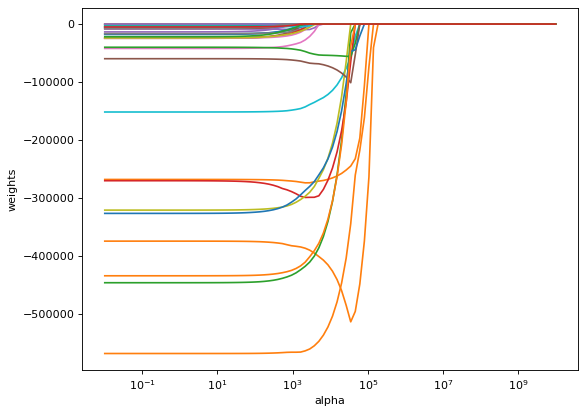

In [1631]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

alphas = 10**np.linspace(10,-2,100)*0.5
alphas
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
figure(figsize=(8, 6), dpi=80)    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [1632]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

64866041.37861483

In [1633]:
usa_net['constant'] = 1
usa_net_tr = usa_net['1997-02-28' : '2017-01-01']
X_train = usa_net_tr
canada_net_tr = canada_net['1997-02-28' : '2017-01-01']
y_train = canada_net_tr['Net']
usa_net_t = usa_net['2017-01-01' : '2021-03-31']
X_test = usa_net_t
canada_net_t = canada_net['2017-01-01' : '2021-03-31']
y_test = canada_net_t['Net']

In [1634]:
rModel = sm.OLS(y_train, X_train)
rModel = rModel.fit()
rModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Net   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.354e+06
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:30:09   Log-Likelihood:                -2127.4
No. Observations:                 239   AIC:                             4325.
Df Residuals:                     204   BIC:                             4447.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Arizona             -1.0022      0.010    -96.453      0.000      -1.023      -0.982
California          -0.9995      0.001  -1343.477      0.000      -1.001      -0.998
Colorado            -1.1805      0.060    -19.557      0.000      -1.300      -1.061
Connecticut         -1.3017      2.334     -0.558      0.578      -5.903       3.300
Idaho               -0.9935      0.021    -47.485      0.000      -1.035      -0.952
Illinois            -1.0267      0.020    -51.938      0.000      -1.066      -0.988
Indiana             -0.9988      0.025    -40.482      0.000      -1.047      -0.950
Iowa                -0.9887      0.033    -29.984      0.000      -1.054      -0.924
Kansas              -0.9870      0.262     -3.763      0.000      -1.504      -0.470
Maine               -1.0012      0.001   -879.839      0.000      -1.003      -0.999
Massachusetts       -0.9959      0.008   -129.281      0.000      -1.011      -0.981
Michigan            -0.9995      0.001  -1617.572      0.000      -1.001      -0.998
Minn / N. Dakota    -1.0013      0.000  -2347.962      0.000      -1.002      -1.000
Minnesota           -0.9996      0.001   -698.655      0.000      -1.002      -0.997
Missouri            -0.9959      0.012    -84.800      0.000      -1.019      -0.973
Montana             -1.0007      0.007   -143.674      0.000      -1.014      -0.987
Nebraska            -1.0023      0.003   -287.114      0.000      -1.009      -0.995
Nevada              -0.9783      0.011    -91.779      0.000      -0.999      -0.957
New England-ISO     -1.0001      0.001  -1798.468      0.000      -1.001      -0.999
New Jersey          -0.9425      0.118     -7.978      0.000      -1.175      -0.710
New Mexico          -1.0364      0.042    -24.439      0.000      -1.120      -0.953
New York            -0.9996      0.000  -2592.935      0.000      -1.000      -0.999
North Dakota        -1.0047      0.004   -245.684      0.000      -1.013      -0.997
Ohio                -0.9996      0.006   -180.408      0.000      -1.010      -0.989
Oklahoma            -0.9922      4.163     -0.238      0.812      -9.201       7.217
Oregon              -0.9968      0.003   -355.625      0.000      -1.002      -0.991
Pennsylvania        -1.0042      0.006   -161.346      0.000      -1.016      -0.992
South Dakota        -0.9972      0.021    -47.832      0.000      -1.038      -0.956
Texas               -0.9977      0.008   -127.748      0.000      -1.013      -0.982
Utah                -0.9482      0.036    -26.205      0.000      -1.020      -0.877
Vermont             -0.9999      0.001  -1343.026      0.000      -1.001      -0.998
Washington          -1.0010      0.000  -2239.853      0.000      -1.002      -1.000
Wisconsin           -0.9885      0.015    -67.000      0.000      -1.018      -0.959
Wyoming             -1.

In [1635]:
y_predict = rModel.predict(X_test)

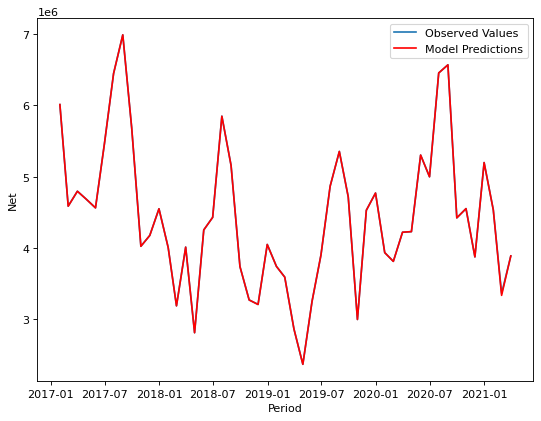

In [1636]:
figure(figsize=(8, 6), dpi=80)
_ = plt.plot(y_test)
_ = plt.plot(y_predict, color = 'red')
_ = plt.xlabel('Period')
_ = plt.ylabel('Net')
_ = plt.legend(['Observed Values','Model Predictions'] )
plt.show()

In [1637]:
rModel = linear_model.LinearRegression(normalize=True)
rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [1638]:
# Evaluate the model  
print(rModel.score(X_train, y_train))

0.999998622003242


In [1639]:
y_predict = rModel.predict(X_test)

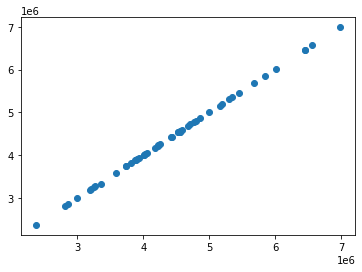

In [1640]:
plt.scatter(y_test, y_predict);

In [1641]:
print("R2 score : %.2f" % r2_score(y_test,y_predict))
print('Coefficients: \n', rModel.coef_)
print("Mean squared error: %.2f" % np.mean((rModel.predict(X_test) - y_test) ** 2))
print('Variance score: %.2f' % rModel.score(X_test, y_test))

R2 score : 1.00
Coefficients: 
 [-1.00224546 -0.99948175 -1.18048939 -1.30166579 -0.99345562 -1.02668408
 -0.9987727  -0.98868045 -0.9869811  -1.00119632 -0.99592854 -0.99945627
 -1.00127517 -0.99962158 -0.99587719 -1.00072901 -1.00230098 -0.97833164
 -1.00014509 -0.9424998  -1.03644965 -0.99956542 -1.00474266 -0.99955702
 -0.99218333 -0.9967515  -1.00419195 -0.99721735 -0.99772025 -0.94819836
 -0.99987817 -1.00103573 -0.98847927 -1.06314508  0.        ]
Mean squared error: 15620214.17
Variance score: 1.00


In [1646]:
from sklearn import datasets
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 10 ** 20 )
lasso.fit(X_train, y_train)
y_predict = lasso.predict(X_test)
lasso.score(X_test, y_test), lasso.score(X_train, y_train)

(-2.9158279459448786, 0.0)

In [1647]:
lasso.coef_

array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,  0., -0., -0.,
       -0., -0.,  0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0.,  0., -0.,  0.])

In [1580]:
y_pred = lasso.predict(X_train)

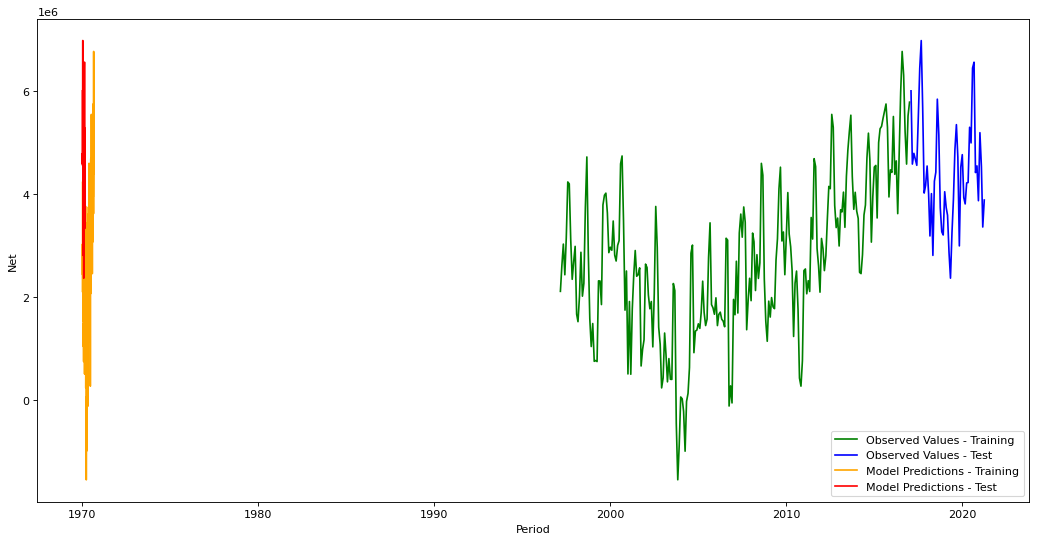

In [1581]:
figure(figsize=(16, 8), dpi=80)
_ = plt.plot(y_train, color = 'green')
_ = plt.plot(y_test, color = 'blue')
_ = plt.plot(y_pred, color = 'orange')
_ = plt.plot(y_predict, color = 'red')
_ = plt.xlabel('Period')
_ = plt.ylabel('Net')
_ = plt.legend(['Observed Values - Training','Observed Values - Test', 'Model Predictions - Training','Model Predictions - Test' ] )
plt.show()

In [1582]:
usa_net['constant'] = 1
usa_net_tr = usa_net['1997-02-28' : '2017-01-01']
X_train = usa_net_tr[['Vermont', 'New England-ISO','New York','Minnesota','California','constant']]
canada_net_tr = canada_net['1997-02-28' : '2017-01-01']
y_train = canada_net_tr['Net']
usa_net_t = usa_net['2017-01-01' : '2021-03-31']
X_test = usa_net_t[['Vermont', 'New England-ISO','New York','Minnesota','California','constant']]
canada_net_t = canada_net['2017-01-01' : '2021-03-31']
y_test = canada_net_t['Net']

In [1583]:
rModel = sm.OLS(y_train, X_train)
rModel = rModel.fit()
rModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Net   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     252.3
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           6.97e-92
Time:                        18:29:20   Log-Likelihood:                -3518.0
No. Observations:                 239   AIC:                             7048.
Df Residuals:                     233   BIC:                             7069.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Vermont            -1.2146      0.170     -7.156      0.000      -1.549      -0.880
New England-ISO    -1.1610      0.140     -8.318      0.000      -1.436      -0.886
New York           -1.3940      0.099    -14.135      0.000      -1.588      -1.200
Minnesota          -1.7481      0.172    -10.143      0.000      -2.088      -1.409
California         -1.7904      0.173    -10.375      0.000      -2.130      -1.450
constant        -1.348e+05   9.64e+04     -1.398      0.163   -3.25e+05    5.52e+04
==============================================================================
Omnibus:                        1.393   Durbin-Watson:                   0.659
Prob(Omnibus):                  0.498   Jarque-Bera (JB):                1.435
Skew:                          -0.124   Prob(JB):                        0.488
Kurtosis:                       2.713   Cond. No.                     2.97e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1584]:
y_predict = rModel.predict(X_test)

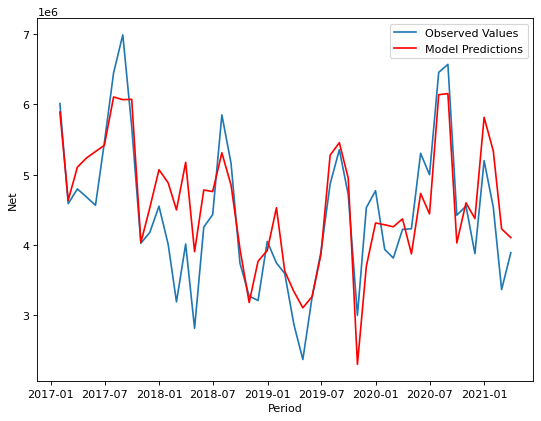

In [1585]:
figure(figsize=(8, 6), dpi=80)
_ = plt.plot(y_test)
_ = plt.plot(y_predict, color = 'red')
_ = plt.xlabel('Period')
_ = plt.ylabel('Net')
_ = plt.legend(['Observed Values','Model Predictions'] )
plt.show()

In [1586]:
y_pred = rModel.predict(X_train)

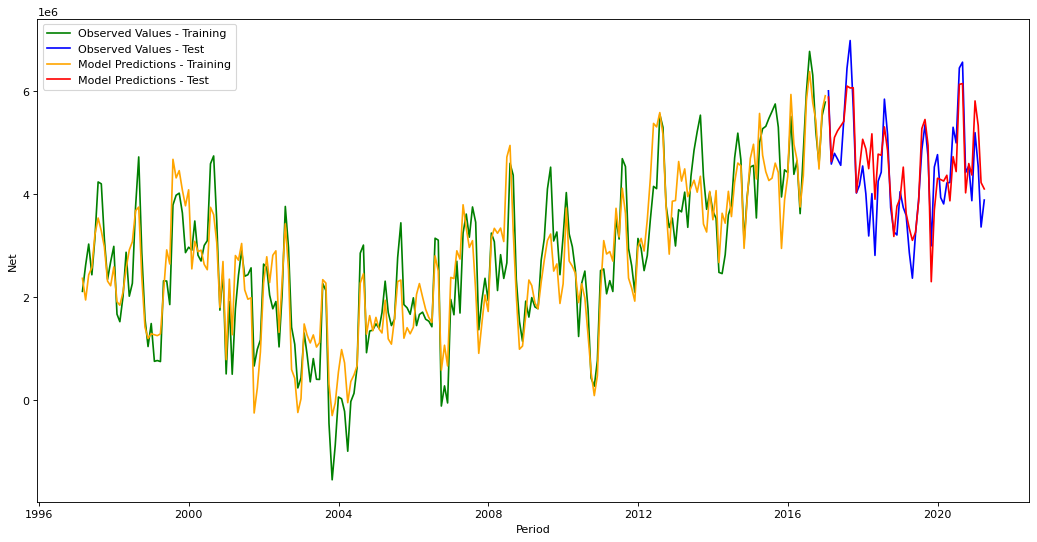

In [1587]:
figure(figsize=(16, 8), dpi=80)
_ = plt.plot(y_train, color = 'green')
_ = plt.plot(y_test, color = 'blue')
_ = plt.plot(y_pred, color = 'orange')
_ = plt.plot(y_predict, color = 'red')
_ = plt.xlabel('Period')
_ = plt.ylabel('Net')
_ = plt.legend(['Observed Values - Training','Observed Values - Test', 'Model Predictions - Training','Model Predictions - Test' ] )
plt.show()

In [1588]:
rModel = linear_model.LinearRegression(normalize=True)
rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [1589]:
# Evaluate the model  
print(rModel.score(X_train, y_train))

0.8440902834964821


In [1590]:
y_predict = rModel.predict(X_test)

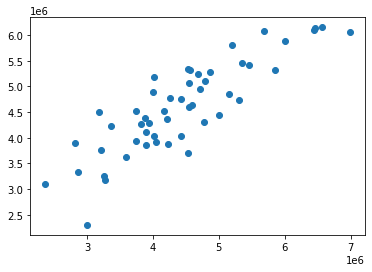

In [1591]:
plt.scatter(y_test, y_predict);

In [1592]:
print("R2 score : %.2f" % r2_score(y_test,y_predict))
print('Coefficients: \n', rModel.coef_)
print("Mean squared error: %.2f" % np.mean((rModel.predict(X_test) - y_test) ** 2))
print('Variance score: %.2f' % rModel.score(X_test, y_test))

R2 score : 0.71
Coefficients: 
 [-1.21464007 -1.1609624  -1.39401625 -1.74809805 -1.79042211  0.        ]
Mean squared error: 299651995974.15
Variance score: 0.71


In [1593]:
from sklearn import datasets
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
y_predict = lasso.predict(X_test)
lasso.score(X_test, y_test), lasso.score(X_train, y_train)

(0.7084484017496484, 0.8440902834964821)

In [1594]:
y_pred = lasso.predict(X_train)

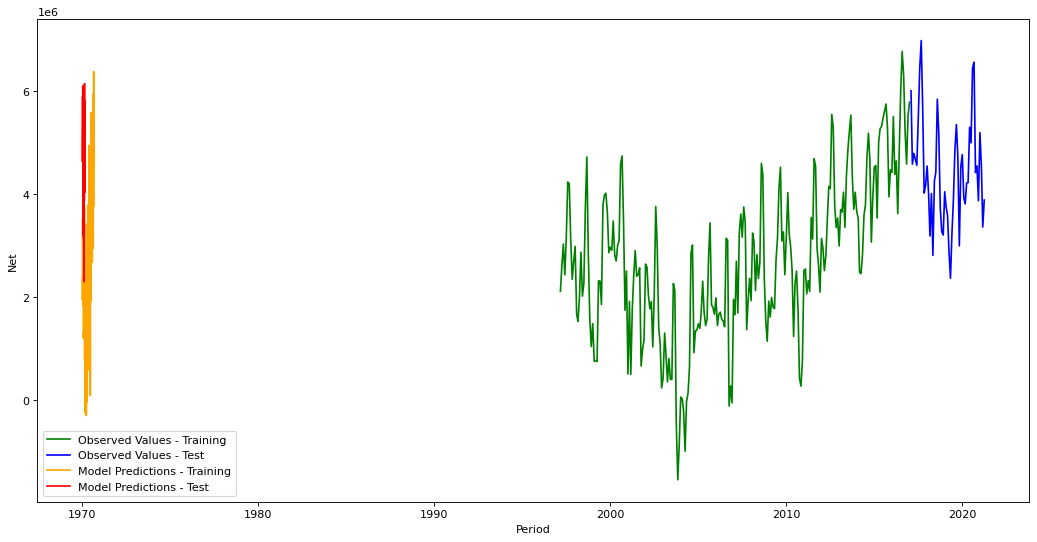

In [1595]:
figure(figsize=(16, 8), dpi=80)
_ = plt.plot(y_train, color = 'green')
_ = plt.plot(y_test, color = 'blue')
_ = plt.plot(y_pred, color = 'orange')
_ = plt.plot(y_predict, color = 'red')
_ = plt.xlabel('Period')
_ = plt.ylabel('Net')
_ = plt.legend(['Observed Values - Training','Observed Values - Test', 'Model Predictions - Training','Model Predictions - Test' ] )
plt.show()